In this file, we are going to represent the maps. We are going to represent four maps, the one with the areas, one with genus, one with samples and the last one with observations

In [ ]:
#Import the necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas
from matplotlib.colors import LogNorm

First of all, to have a first idea about the areas, we represent just the areas, without more information

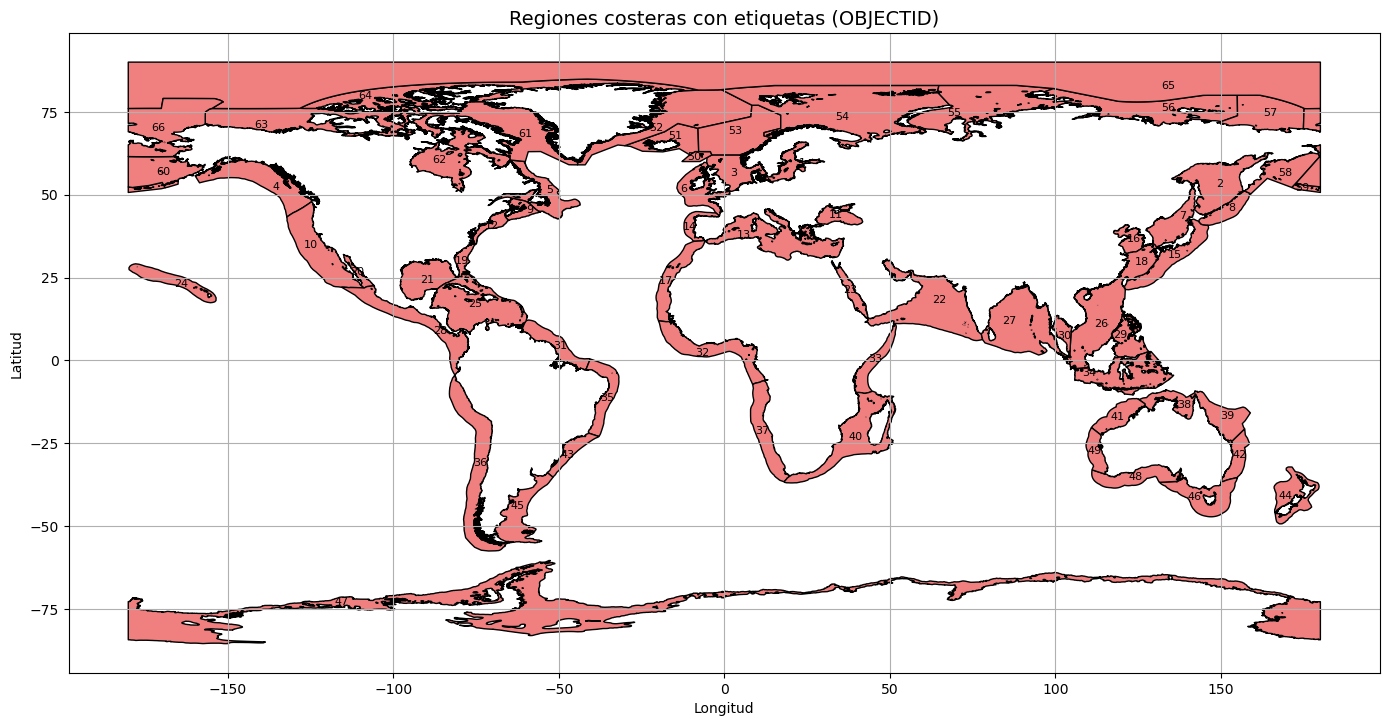

In [ ]:


# Load the shapefile
shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\lme66.shp')
shapefile = shapefile.set_crs(epsg=4326)

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Draw the polygones in light coral color with black edges
shapefile.plot(ax=ax, edgecolor='black', facecolor='lightcoral')

# Include the number of the areas in each polygon
for idx, row in shapefile.iterrows():
    # Obtain the point in which it is going to be represented the number
    representative_point = row.geometry.representative_point()
    
    # Aggregate the label in that point
    ax.text(representative_point.x, representative_point.y, 
            str(row["OBJECTID"]),  # o row["NAME"] si prefieres el nombre
            fontsize=8, ha='center', va='center', color='black')

# Put the title and labels
ax.set_title("Regiones costeras con etiquetas (OBJECTID)", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

Once we have represented the raw map, just the areas, we are going to represent a map with colors depending on the area

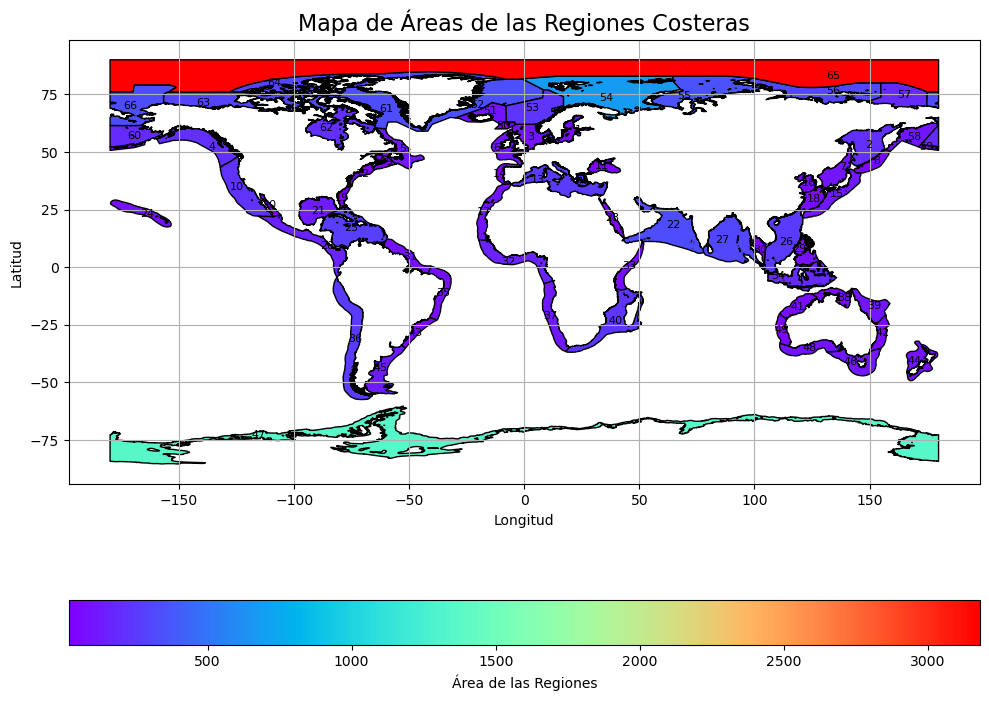

In [ ]:


# Load the shapefile again for the next plot
shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\lme66.shp')
shapefile = shapefile.set_crs(epsg=4326)

# Create figure and axes for the map
fig, ax = plt.subplots(figsize=(10, 8))

# Color the regions following the area (Shape_Area column)
# We use a colormap based on the area of each region
shapefile.plot(column='Shape_Area', ax=ax, legend=True,
              legend_kwds={'label': "Área de las Regiones",
                           'orientation': "horizontal"},
              cmap='rainbow',  
              edgecolor='black')

# We aggregate the number of the areas in each  polygon, as before
for idx, row in shapefile.iterrows():
    
    representative_point = row.geometry.representative_point()
    
    
    ax.text(representative_point.x, representative_point.y, 
            str(row["OBJECTID"]),  
            fontsize=8, ha='center', va='center', color='black')


# We add the title and the labels
ax.set_title("Mapa de Áreas de las Regiones Costeras", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

#We show the plot
plt.tight_layout()
plt.show()


In [21]:
shapefile.set_index('OBJECTID', inplace=True)

In [22]:
shapefile

,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
OBJECTID,,,,,
1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805..."
2,52.0,Sea of Okhotsk,145.932989,213.796584,"POLYGON ((156.70705 51.18858, 156.62592 51.160..."
3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ..."
4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0..."
5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ..."
...,...,...,...,...,...
62,63.0,Hudson Bay Complex,391.717406,209.464313,"MULTIPOLYGON (((-64.79667 59.98027, -64.81194 ..."
63,55.0,Beaufort Sea,478.747080,292.450949,"POLYGON ((-122.68333 76.0198, -122.6989 76.018..."
64,66.0,Canadian High Arctic - North Greenland,1059.501342,297.732265,"MULTIPOLYGON (((-122.5625 76.01443, -122.56585..."


Once we have a better idea of the areas, we are going to represent the number of samples, genus and observations that are on each area

In [ ]:
#We load the data of the number of samples, observations and genus
areas=pandas.read_csv('numero_generos_muestras_observaciones.csv')

In [ ]:
#We merge the data with the shapefile
shapefile_combined = shapefile.merge(areas, left_on='OBJECTID', right_on='OBJECTID', how='left')

In [ ]:
#We save this information in a new CSV file
shapefile_combined.to_csv('lme66_areas.csv', index=False)

In [32]:
shapefile_combined.set_index('OBJECTID', inplace=True)

Index(['OBJECTID', 'LME_NUMBER', 'LME_NAME', 'Shape_Leng', 'Shape_Area',
       'geometry', 'genusid', 'muestra', 'num_observaciones'],
      dtype='object')


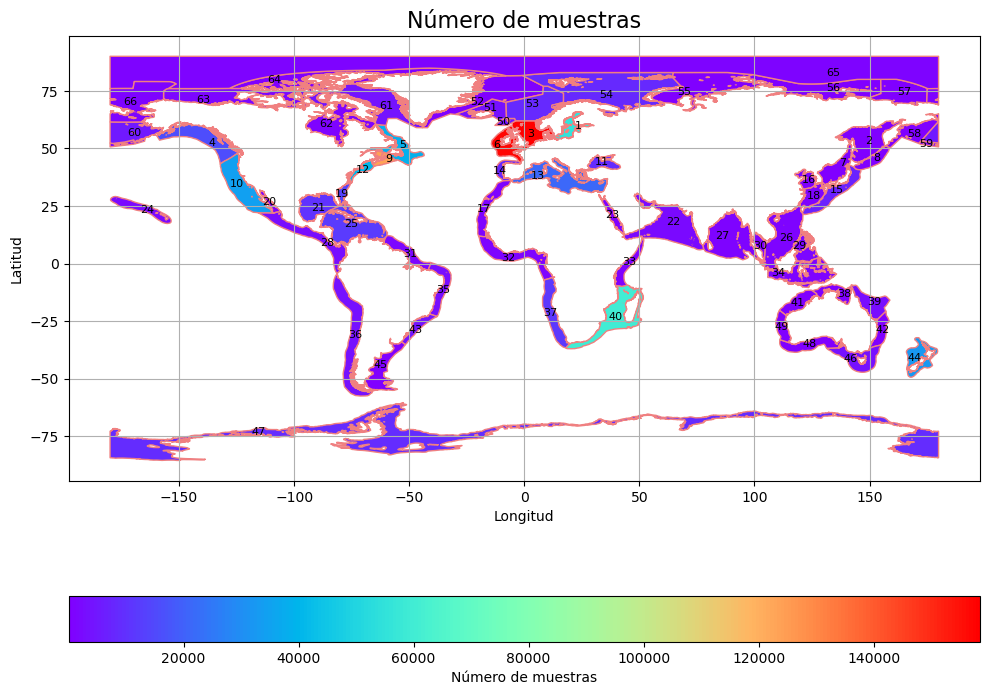

In [ ]:
#Here, we represent the three maps, the same code for each map, we have just changed the column to muestra, genus and observations

# Create figure and axes for the map
fig, ax = plt.subplots(figsize=(10, 8))

# Color the regions following the value of the three columns 'genusid', 'muestra' and 'observaciones'
shapefile_combined.plot(column='muestra', ax=ax, legend=True,
              legend_kwds={'label': "Número de muestras",
                           'orientation': "horizontal"},
              cmap='rainbow',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral')


# We aggregate the number of the area in each polygon, as before
for idx, row in shapefile_combined.iterrows():
    
    representative_point = row.geometry.representative_point()
    
    
    ax.text(representative_point.x, representative_point.y, 
            str(row["OBJECTID"]),  
            fontsize=8, ha='center', va='center', color='black')

# We write the title and the labels
ax.set_title("Número de muestras", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# We show the plot
plt.tight_layout()
plt.show()


Once we have done this plots, we realize that the observations and samples maps doesn't show the information correctly. There are some outliers near United Kingdom that doesn't allow to see the differences of the data in the rest of the world. To solve this problem, we are going to plot the maps in a logistic scale

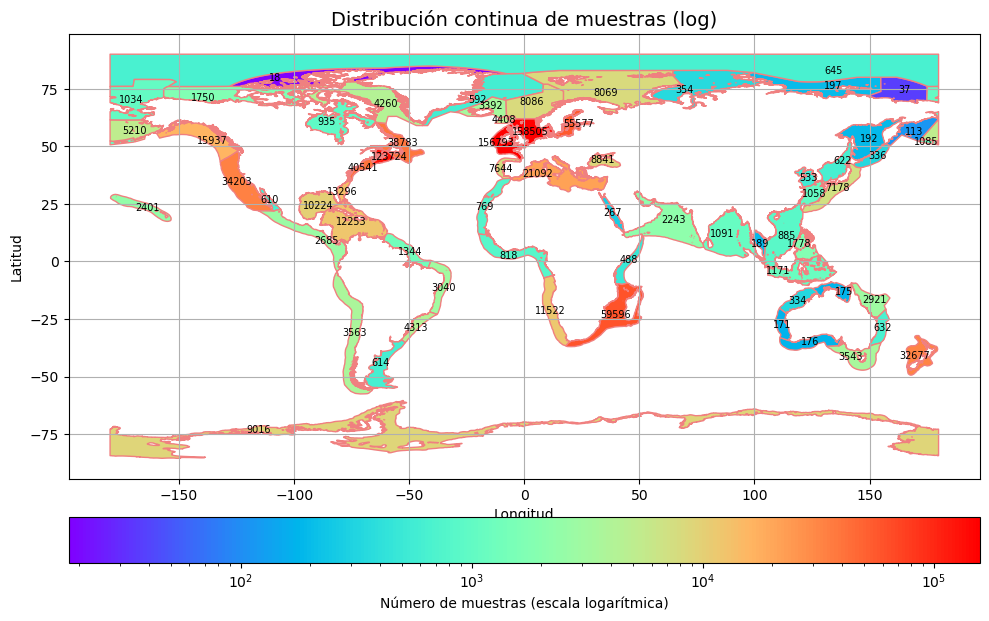

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Obtain the values for the 'muestra' column, it is done equal for the 'observaciones' column
values = shapefile_combined['muestra']

# Create the colormap with logarithmic normalization
norm = LogNorm(vmin=values[values > 0].min(), vmax=values.max())  # evitar log(0)
cmap = plt.cm.rainbow

# We assign a color to each polygon based on the 'muestra' values
shapefile_combined.plot(
    ax=ax,
    color=[cmap(norm(val)) if val > 0 else (1,1,1,0) for val in values],  
    edgecolor='lightcoral',
)

# Create a colorbar with logarithmic scale
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Número de muestras (escala logarítmica)")

# Agregate the labels for each polygon, it shows the number of samples
for idx, row in shapefile_combined.iterrows():
    pt = row.geometry.representative_point()
    ax.text(pt.x, pt.y, str(row['muestra']), fontsize=7, ha='center', va='center', color='black')

# We write the title and the labels
ax.set_title("Distribución continua de muestras (log)", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

#We plot the figure
plt.tight_layout()
plt.show()


Here, we have observated that there are areas that we don't need in our model because we don't have points there. For this reason, we have eliminated the areas 51, 24, 11 and 23.

In [ ]:
#We drop the columns that correspond to the areas that are not needed
shapefile_areas=shapefile_combined.drop(
    shapefile_combined[shapefile_combined['OBJECTID'].isin([51,24,11,23])].index
)

In [12]:
shapefile_combined

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry,genusid,muestra,num_observaciones
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805...",439,55577,727283
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"POLYGON ((156.70705 51.18858, 156.62592 51.160...",98,192,414
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ...",1299,158505,1231679
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0...",1022,15937,142239
4,5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ...",514,38783,251942
...,...,...,...,...,...,...,...,...,...
61,62,63.0,Hudson Bay Complex,391.717406,209.464313,"MULTIPOLYGON (((-64.79667 59.98027, -64.81194 ...",288,935,7322
62,63,55.0,Beaufort Sea,478.747080,292.450949,"POLYGON ((-122.68333 76.0198, -122.6989 76.018...",413,1750,34877
63,64,66.0,Canadian High Arctic - North Greenland,1059.501342,297.732265,"MULTIPOLYGON (((-122.5625 76.01443, -122.56585...",53,18,1851
64,65,64.0,Central Arctic,760.568294,3181.188855,"POLYGON ((180 75.98248, 179.29807 75.97633, 17...",196,645,31765


In [ ]:
#We replace the number of the areas that are not needed
shapefile_areas["OBJECTID"]=shapefile_areas["OBJECTID"].replace({52: 51, 25: 24, 12: 11, 22: 23})

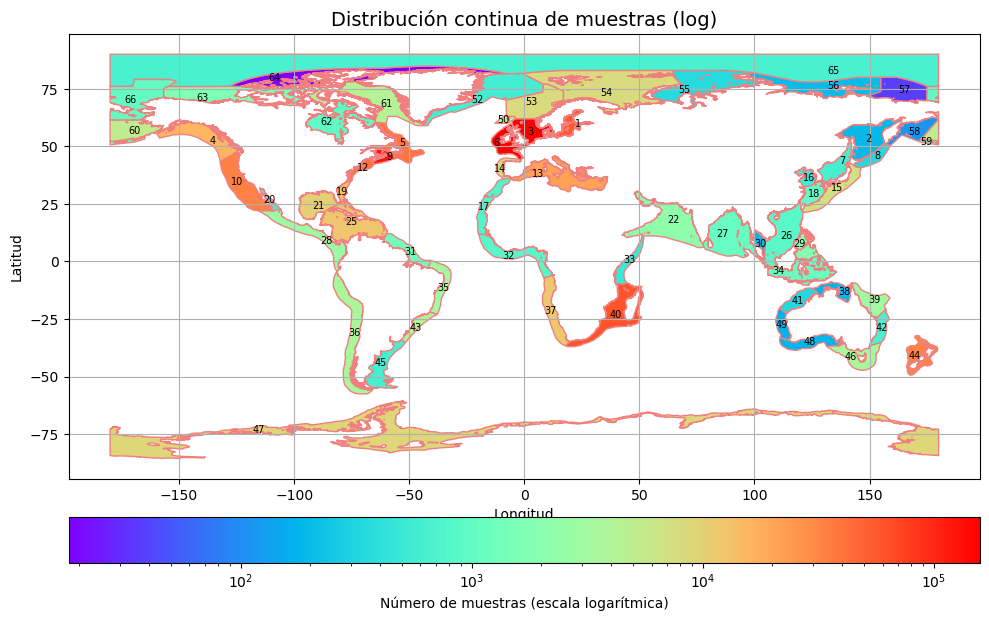

In [ ]:
#We represent the map only with the needed areas

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Obtener los valores originales (sin transformar)
values = shapefile_areas['muestra']

# Crear colormap con LogNorm
norm = LogNorm(vmin=values[values > 0].min(), vmax=values.max())  # evitar log(0)
cmap = plt.cm.rainbow

# Graficar manualmente con colores logarítmicos
shapefile_areas.plot(
    ax=ax,
    color=[cmap(norm(val)) if val > 0 else (1,1,1,0) for val in values],  # asignar color a cada polígono
    edgecolor='lightcoral',
)

# Crear barra de color (colorbar)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Número de muestras (escala logarítmica)")

# Agregar etiquetas OBJECTID
for idx, row in shapefile_areas.iterrows():
    pt = row.geometry.representative_point()
    ax.text(pt.x, pt.y, str(row['OBJECTID']), fontsize=7, ha='center', va='center', color='black')

# Título y ejes
ax.set_title("Distribución continua de muestras (log)", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

plt.tight_layout()
plt.show()
